In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gpagk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
reviews_df = pd.read_csv('reviews_1.csv')
# Replace the NaN column with 0
reviews_df.fillna(0, inplace=True)

In [3]:
reviewed_listings= reviews_df.groupby('listing_id').id.count()
reviewed_listings = reviewed_listings.reset_index()
reviewed_listings = reviewed_listings.rename(columns={'listing_id':'id','id': 'number_of_reviews'})

In [4]:
df = pd.read_csv('listings.csv',index_col=False)

# Replace the NaN column with 0
df.fillna(0, inplace=True)

# Extracting the price . column
price = df['price']
prices = []

# converts string to float
for p in price:
    p = float(p[1:].replace(',', ''))
    prices.append(p)
    
# Replace the price column with a new one
df['price'] = prices

# Show heade
#df.head()

In [5]:
reviewed_neighbourhood = pd.merge(reviewed_listings, df[['id','neighbourhood_cleansed']], on="id")

In [6]:
reviewed_room = pd.merge(reviewed_listings, df[['id','room_type']], on="id")

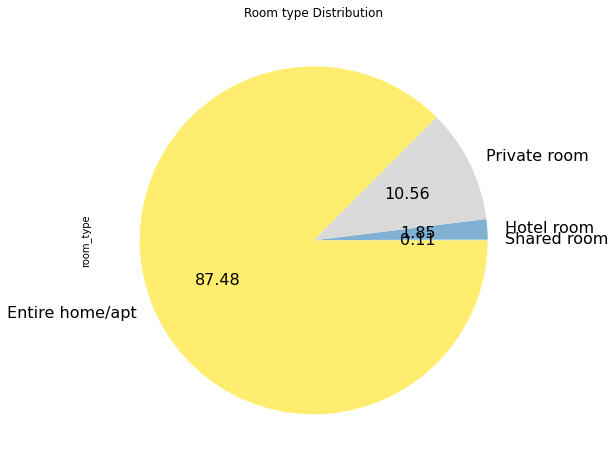

In [7]:
%matplotlib inline

# Meng-import library
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter


# Retrieve room type data
room = df.room_type
r = Counter(room)

# Creating a new dataframe
room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']

# Plot to pie chart

room_df.plot.pie(y = 'room_type', 
                 colormap = 'Set3',
                 figsize = (8, 8),
                 fontsize = 16, 
                 autopct = '%.2f',
                 legend = False,
                 title = 'Room type Distribution')

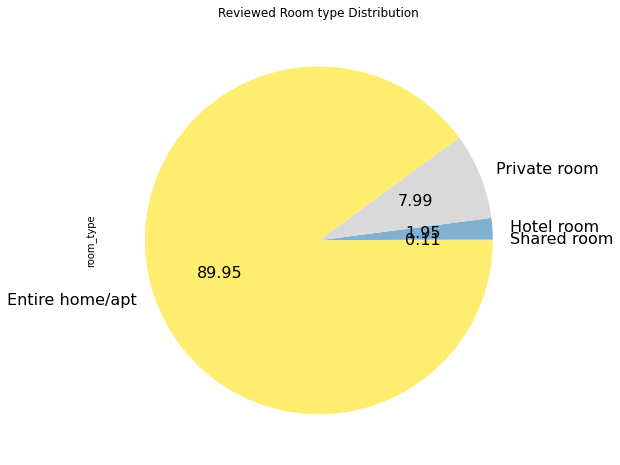

In [8]:
room = reviewed_room.room_type
r = Counter(room)

reviewed_room = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
reviewed_room.columns = ['room_type']

# Plot to pie chart

reviewed_room.plot.pie(y = 'room_type', 
                 colormap = 'Set3',
                 figsize = (8, 8),
                 fontsize = 16, 
                 autopct = '%.2f',
                 legend = False,
                 title = 'Reviewed Room type Distribution')

In [9]:
room_price_df = df[['room_type','price']].groupby('room_type').mean().reset_index()

In [10]:
#average room type price
room_price_df

,room_type,price
0,Entire home/apt,181.021950
1,Hotel room,137.129108
2,Private room,131.606996
3,Shared room,27.400000


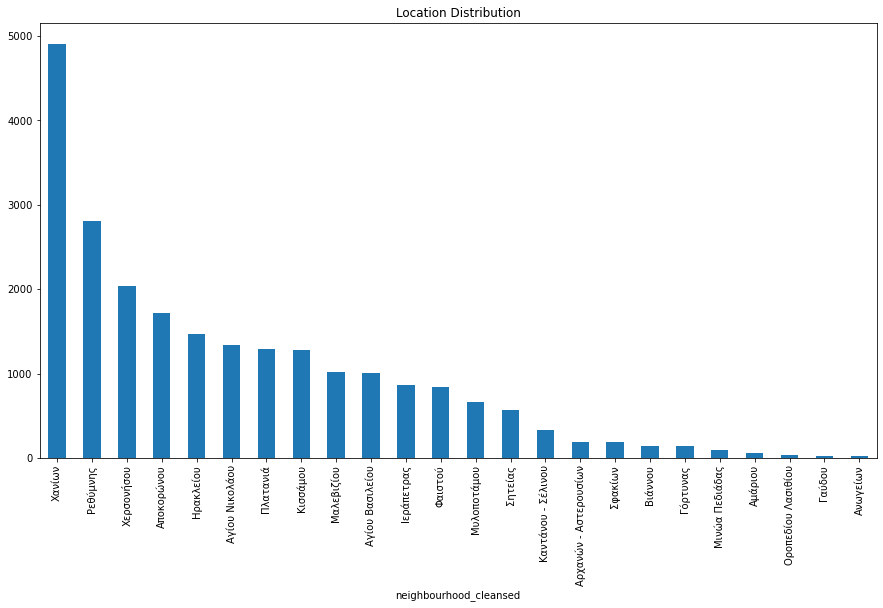

In [11]:
neighbourhood_df = df.groupby('neighbourhood_cleansed').id.count()
neighbourhood_df = neighbourhood_df.reset_index()
neighbourhood_df = neighbourhood_df.rename(columns={'id': 'number_of_listings'})
neighbourhood_df = neighbourhood_df.sort_values('number_of_listings',ascending=False)
# Plot to diagram bar
neighbourhood_df.plot.bar(x = 'neighbourhood_cleansed',
                          y = 'number_of_listings',
                          figsize = (15, 8),
                          title = 'Location Distribution',
                          legend = False)

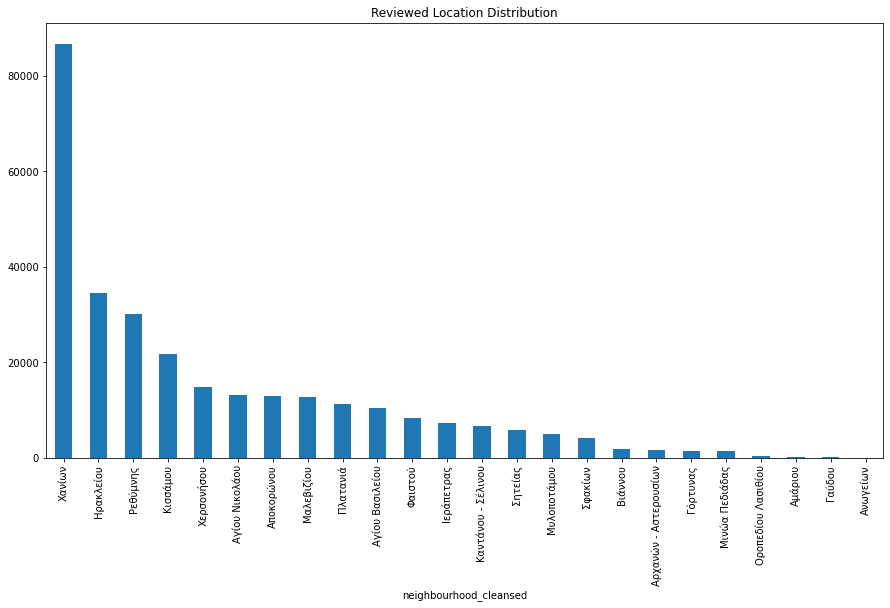

In [12]:
reviewed_neighbourhood.drop(columns='id',inplace=True)
reviewed_neighbourhood = reviewed_neighbourhood.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()
reviewed_neighbourhood = reviewed_neighbourhood.reset_index()
reviewed_neighbourhood  = reviewed_neighbourhood.rename(columns={'id': 'number_of_reviews'})
reviewed_neighbourhood  =reviewed_neighbourhood.sort_values('number_of_reviews',ascending=False)

reviewed_neighbourhood.plot.bar(x = 'neighbourhood_cleansed',
                          y = 'number_of_reviews',
                          figsize = (15, 8),
                          title = 'Reviewed Location Distribution',
                          legend = False)

In [13]:
price_df = df[['neighbourhood_cleansed','price']].groupby('neighbourhood_cleansed').mean()

In [14]:
price_df=price_df.sort_values('price',ascending=False).reset_index()

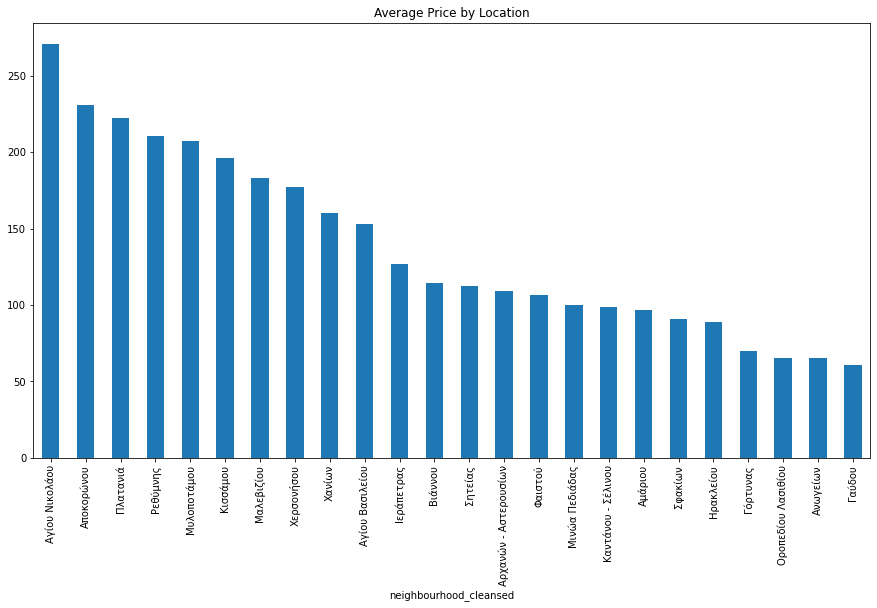

In [15]:
price_df.plot.bar(x = 'neighbourhood_cleansed',
                          y = 'price',
                          figsize = (15, 8),
                          title = 'Average Price by Location',
                          legend = False)

In [16]:
reviews_df = reviews_df.dropna()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,26022973,417804346274911550,2021-07-30,47111987,Michaela,Magda has a great place and she is so so very ...
1,26022973,405487558984870566,2021-07-13,46134969,Jonathan,very new and clean place! about 30min from Her...
2,26022973,619373661223842593,2022-05-04,124526837,Yassin,Nicle Appartement close to many shops and coff...
3,26022973,455529932496460004,2021-09-20,396507221,Njai Lima,Very nice stay! Good communication with the ho...
4,26022973,446118108506976020,2021-09-07,278617338,Jonas,Magda is a very nice and friendly host. She re...
...,...,...,...,...,...,...
293399,36975639,703152241,2020-10-24,97492177,Carina Alexandra,Wir waren 1 Woche bei Antonis. Das Zimmer ist ...
293400,36975639,672514983,2020-10-09,175990802,Hanna,Antonis und alle Mitarbeiter sind sehr freundl...
293401,36975639,644975323,2020-08-01,154924634,Marine,Nous avons passé une semaine entre copines che...
293402,36975639,530756585,2019-09-16,289101464,Helene,"Bien situé près de petit commerces, la mer en ..."


following code might run for severel minutes (approximately 30mins)

In [17]:
from tqdm import tqdm
# Our dataframe consists of reviews in different language as well.Hence removing the comments which are not in english
from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index,row in tqdm(reviews_df.iterrows()):
    lang=detect_lang(row['comments'])
    reviews_df.at[index,'language'] = lang
    
#taking rows whose language is English
reviews_df=reviews_df[reviews_df.language=='en']

reviews_df.head(2)

293404it [29:39, 164.88it/s]


,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,26022973,417804346274911550,2021-07-30,47111987,Michaela,Magda has a great place and she is so so very ...,en
1,26022973,405487558984870566,2021-07-13,46134969,Jonathan,very new and clean place! about 30min from Her...,en


In [18]:
#reviews_df.to_csv('Reviews_clean.csv')

In [20]:
#assigning polarity score to each comment and adding the same to dataframe

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviews_df['polarity_value']="Default"
reviews_df['neg']=0.0
reviews_df['pos']=0.0
reviews_df['neu']=0.0
reviews_df['compound']=0.0
for index,row in tqdm(reviews_df.iterrows()):
    ss = sid.polarity_scores(row['comments'])
    reviews_df.at[index,'polarity_value']=ss
    reviews_df.at[index,'neg']=ss['neg']
    reviews_df.at[index,'pos'] = ss['pos']
    reviews_df.at[index,'neu'] =ss['neu']
    reviews_df.at[index,'compound'] =ss['compound']
reviews_df.head()

<ipython-input-20-79f45bccbeb1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['polarity_value']="Default"
<ipython-input-20-79f45bccbeb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['neg']=0.0
<ipython-input-20-79f45bccbeb1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity_value,neg,pos,neu,compound
0,26022973,417804346274911550,2021-07-30,47111987,Michaela,Magda has a great place and she is so so very ...,en,"{'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...",0.000,0.370,0.630,0.9457
1,26022973,405487558984870566,2021-07-13,46134969,Jonathan,very new and clean place! about 30min from Her...,en,"{'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'comp...",0.000,0.407,0.593,0.9527
2,26022973,619373661223842593,2022-05-04,124526837,Yassin,Nicle Appartement close to many shops and coff...,en,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.000,0.231,0.769,0.6908
3,26022973,455529932496460004,2021-09-20,396507221,Njai Lima,Very nice stay! Good communication with the ho...,en,"{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",0.000,0.336,0.664,0.9124
4,26022973,446118108506976020,2021-09-07,278617338,Jonas,Magda is a very nice and friendly host. She re...,en,"{'neg': 0.021, 'neu': 0.693, 'pos': 0.285, 'co...",0.021,0.285,0.693,0.9635


In [25]:
reviews_df=reviews_df[['comments','neg','neu','pos']]
reviews_df.reset_index(drop=True,inplace=True)
#reviews_df.to_csv('Reviews_sentiment.csv')
#reviews_df = pd.read_csv('Reviews_sentiment.csv')

In [27]:
reviews_df.loc[reviews_df['neg']>0.5]

,comments,neg,neu,pos
402,book it! no regrets at all,0.555,0.445,0.000
34357,alles war Top,0.582,0.149,0.269
39106,Hold your self faraway from this bad place. Ba...,0.694,0.306,0.000
43954,Expensive and poor cleaning.,0.508,0.492,0.000
49714,Es war toll!,0.677,0.323,0.000
50625,No public review.,0.524,0.476,0.000
53636,"Nothing special, but ok!",0.680,0.320,0.000
54657,alles war gut,0.661,0.339,0.000
59671,Nothing short of brilliant.,0.506,0.494,0.000
66842,nothing but good things,0.509,0.491,0.000


In [33]:
#manually remove some leftover german and misclassifications
reviews_df.drop([402,34357,49714,54657,59671,85440,104995,127187,130667,131697,163349], axis=0, inplace=True)
reviews_df.reset_index(drop=True,inplace=True)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
reviews_df.loc[reviews_df['neg']>0.5]

,comments,neg,neu,pos
39104,Hold your self faraway from this bad place. Ba...,0.694,0.306,0.0
43952,Expensive and poor cleaning.,0.508,0.492,0.0
50622,No public review.,0.524,0.476,0.0
53633,"Nothing special, but ok!",0.680,0.320,0.0
66837,nothing but good things,0.509,0.491,0.0
93835,Worse than expected,0.608,0.392,0.0
94633,Very disappointing place,0.636,0.364,0.0
108843,Misleading ad. Rude service,0.740,0.260,0.0
113512,"nothing special, good journey!",0.712,0.288,0.0
132390,The toilet is disgusting,0.531,0.469,0.0


In [35]:
def sentiment_column(row):
    if (row['pos']>0.5):
        return 2
    elif (row['neg']>0.5):
        return 0 
    else :
        return 1

In [36]:
reviews_df['sentiment'] = reviews_df.apply (lambda row: sentiment_column(row), axis=1)
reviews_df=reviews_df[['comments','sentiment']]

<ipython-input-36-f57dbc3e5255>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['sentiment'] = reviews_df.apply (lambda row: sentiment_column(row), axis=1)


In [37]:
#reviews_df.to_csv('Reviews_sentiment_clean_copy.csv')
#reviews_df = pd.read_csv('Reviews_sentiment.csv')